In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Read Data
df = pd.read_csv("data/winequality-red.csv")

# Exploratory Data Analysis

In [5]:
# View first five rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# View the summary statistics of overall dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
# View distinct target class
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

<AxesSubplot: >

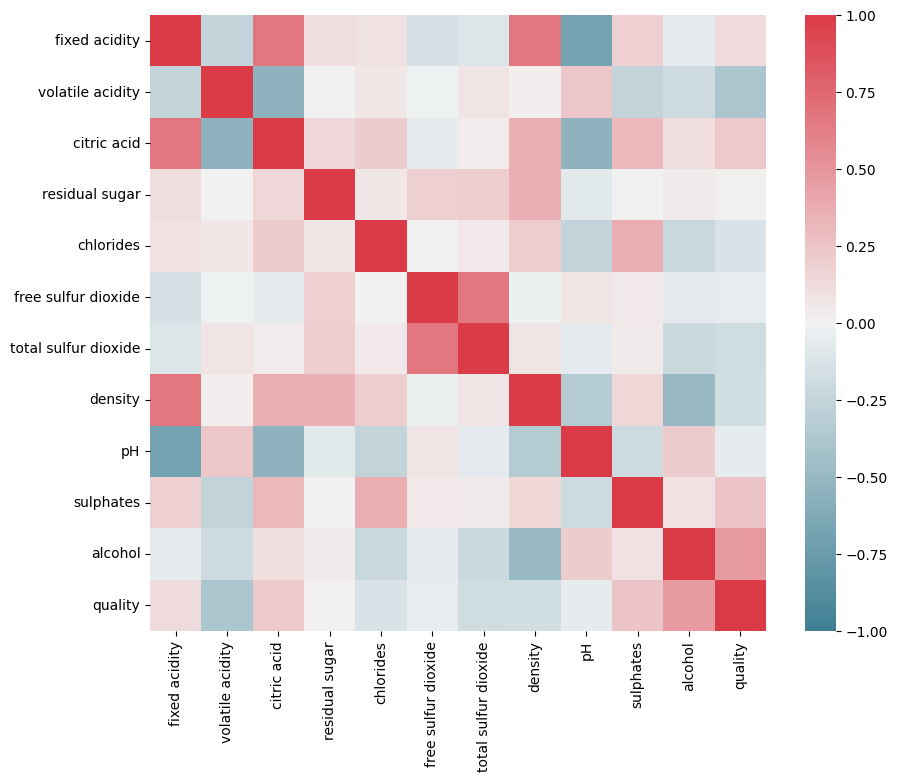

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

<AxesSubplot: xlabel='fixed acidity', ylabel='volatile acidity'>

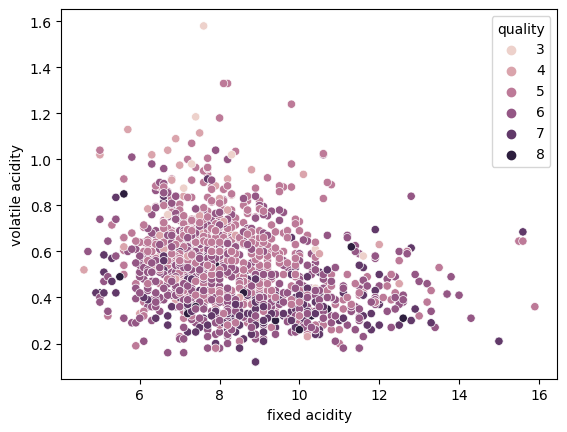

In [18]:
sns.scatterplot(data=df, x="fixed acidity", y="volatile acidity", hue="quality")

In [19]:
encodings = {
    "3": 0,
    "4": 1,
    "5": 2,
    "6": 3,
    "7": 4,
    "8": 5
}

In [23]:
for ind, row in df.iterrows():
    df.loc[ind, "label"] = encodings[str(int(row["quality"]))]

In [24]:
X = df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
y = df["label"]

In [26]:
# Use StandardScale to normalize the data
std = StandardScaler()

X_scaler = std.fit_transform(X)

In [28]:
# Split dataset into train/test

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.30, random_state=42)

# Naive Bayes Classifier

In [29]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()

nb_clf.fit(X_train, y_train)

GaussianNB()

In [30]:
y_pred = nb_clf.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred) * 100

print("The accuracy of the model is: {0}%".format(acc))

The accuracy of the model is: 53.75%


# KNeighbors Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()

kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
y_pred = kn_clf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred) * 100

print("The accuracy of the model is: {0}%".format(acc))

The accuracy of the model is: 57.08333333333333%


# Decisiont Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

dc_clf = DecisionTreeClassifier(criterion="entropy", splitter='best', max_depth=None, random_state=0)

dc_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [56]:
y_pred = dc_clf.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred) * 100

print("The accuracy of the model is: {0}%".format(acc))

The accuracy of the model is: 58.12500000000001%


# K-Means Clustering

In [49]:
# Finding optimal k
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=12, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

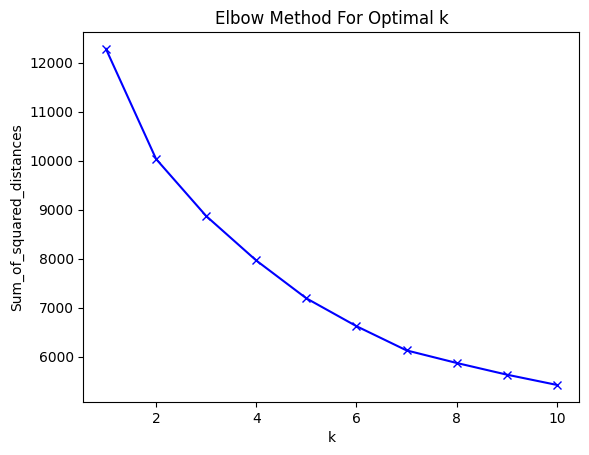

In [50]:
plt.plot(range(1, 11), wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=12, random_state=0)
kmeans.fit(X_train)

KMeans(n_clusters=5, n_init=12, random_state=0)

In [52]:
y_pred = kmeans.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred) * 100

print("The accuracy of the model is: {0}%".format(acc))

The accuracy of the model is: 28.333333333333332%
